In [27]:
import PyRapidML

In [28]:
from PyRapidML.datasets import extract_data
dataset = extract_data('diamond')

#check the shape of data
dataset.shape




,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


(6000, 8)

In [29]:
from PyRapidML.regression import *


In [32]:
c = check_na(dataset)

NameError: name 'check_na' is not defined

In [3]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))




Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [4]:
from PyRapidML.regression import *

exp_reg101 = initializer(data = data, target = 'Price', session_id=123) 



,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [5]:
comparing_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.6390
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.5050
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.1090
gbr,Gradient Boosting Regressor,920.0795,3763128.6878,1900.8431,0.9633,0.1024,0.0770,0.1310
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0190
ridge,Ridge Regression,2413.5698,14120470.5000,3726.1617,0.8621,0.6689,0.2875,0.0140
lasso,Lasso Regression,2412.1924,14246798.7000,3744.2306,0.8608,0.6767,0.2866,0.0220
llar,Lasso Least Angle Regression,2355.6150,14272022.6482,3745.3097,0.8607,0.6391,0.2728,0.0150
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.0150
lr,Linear Regression,2418.7515,14281049.5000,3749.1672,0.8604,0.6652,0.2879,0.4420


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [6]:
et = creating_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,707.4265,1349071.2494,1161.4953,0.9852,0.0826,0.0612
1,833.5072,4804413.8034,2191.8973,0.9632,0.0785,0.0586
2,752.4157,1844567.0102,1358.1484,0.9831,0.0800,0.0606
3,753.8686,1869736.9868,1367.3833,0.9794,0.0769,0.0589
4,779.2160,4329588.5995,2080.7663,0.9460,0.0868,0.0636
5,848.3772,5298514.5534,2301.8502,0.9548,0.0875,0.0632
6,742.1591,2230824.0828,1493.5944,0.9790,0.0780,0.0582
7,707.5904,1594038.1922,1262.5523,0.9798,0.0789,0.0601
8,687.2104,1508385.7453,1228.1636,0.9852,0.0744,0.0569
9,808.3469,2810851.3617,1676.5594,0.9732,0.0938,0.0662


In [7]:
#trained model object is stored in the variable 'et'. 
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


In [8]:
tuned_et = tuning_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,795.4372,1675059.8952,1294.2410,0.9816,0.0933,0.0714
1,945.1730,7577490.0615,2752.7241,0.9419,0.0943,0.0693
2,928.7147,3314490.7028,1820.5743,0.9696,0.0968,0.0763
3,873.4149,2043911.1688,1429.6542,0.9774,0.0952,0.0744
4,812.9691,1923550.2182,1386.9211,0.9760,0.0989,0.0749
5,1049.2058,7752271.0556,2784.2900,0.9338,0.1029,0.0769
6,905.7305,3940483.9518,1985.0652,0.9630,0.0945,0.0724
7,892.1834,2984243.5372,1727.4963,0.9623,0.0967,0.0742
8,921.9705,2901487.9263,1703.3755,0.9715,0.0964,0.0749
9,995.1728,4327811.6530,2080.3393,0.9588,0.1130,0.0817


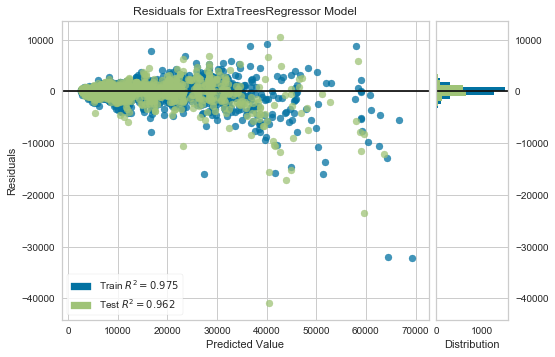

In [9]:
plot_model(tuned_et)

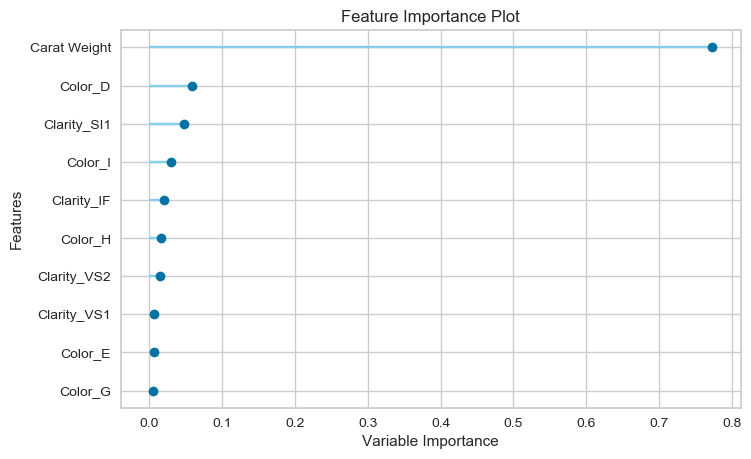

In [10]:
plot_model(tuned_et, plot='feature')


In [11]:
evaluate_model(tuned_et)


interactive(children=(ToggleButtons(description='Plot Type:', icons=[''], options=(('Hyperparameters', 'parameter'), ('Residuals', 'residuals'), ('Prediction Error', 'error'), ('Cooks Distance', 'cooks'), ('Feature Selection', 'rfe'), ('Learning Curve', 'learning'), ('Manifold Learning', 'manifold'), ('Validation Curve', 'vc'), ('Feature Importance', 'feature'), ('Feature Importance (All)', 'feature_all'), ('Decision Tree', 'tree'), ('Interactive Residuals', 'residuals_interactive')), value='parameter'), Output()), _dom_classes=('widget-interact',))

In [12]:
predict_model(tuned_et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,927.0049,4196880.9631,2048.6290,0.9617,0.0963,0.0730


In [13]:
final_et = finalize_model(tuned_et)

In [14]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [26]:
predict_model(final_et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,818.8669,2718002.9269,1648.6367,0.9752,0.0866,0.0665


In [27]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10383.162397
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15874.992541
2,1.51,Good,F,SI1,VG,G,GIA,10429,11078.493677
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4304.685818
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4367.487660


In [28]:
save_model(final_et,'Final ET Model 30May2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=9,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_i

In [29]:
saved_final_et = load_model('Final ET Model 30May2021')

Transformation Pipeline and Model Successfully Loaded


In [30]:
new_prediction = predict_model(saved_final_et, data=data_unseen)

In [31]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10383.162397
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15874.992541
2,1.51,Good,F,SI1,VG,G,GIA,10429,11078.493677
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4304.685818
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4367.487660
